# Car Analysis Project 

## 1. Import Required Libraries

In [44]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score 
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor

import joblib

plt.style.use("ggplot")

pandas, numpy → used for data handling and calculations

matplotlib → for graphs (optional)

train_test_split → splits data into training and testing parts

OneHotEncoder → converts text data (company, fuel type) into numbers

ColumnTransformer → applies encoding only to selected columns

Pipeline → combines preprocessing + model in one flow

RandomForestRegressor → machine learning model

metrics → measure model accuracy

joblib → saves trained model

## 2. Load Detaset

In [45]:
df = pd.read_csv("quikr_car.csv")

Reads the Quikr car dataset from CSV file into a DataFrame for processing.

## 3. Information about data

In [46]:
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [47]:
df.tail()

,name,company,year,Price,kms_driven,fuel_type
887,Ta,Tara,zest,"3,10,000",NaN,NaN
888,Tata Zest XM Diesel,Tata,2018,"2,60,000","27,000 kms",Diesel
889,Mahindra Quanto C8,Mahindra,2013,"3,90,000","40,000 kms",Diesel
890,Honda Amaze 1.2 E i VTEC,Honda,2014,"1,80,000",Petrol,NaN
891,Chevrolet Sail 1.2 LT ABS,Chevrolet,2014,"1,60,000",Petrol,NaN


In [48]:
df.shape

(892, 6)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [50]:
df.describe(include="all")

,name,company,year,Price,kms_driven,fuel_type
count,892,892,892,892,840,837
unique,525,48,61,274,258,3
top,Honda City,Maruti,2015,Ask For Price,"45,000 kms",Petrol
freq,13,235,117,35,30,440


In [51]:
df.isnull().sum()

name           0
company        0
year           0
Price          0
kms_driven    52
fuel_type     55
dtype: int64

## 4. Backup Dataset

In [52]:
df_backup = df.copy()

## 5. Data Cleaning

### clean year columns

In [53]:
df = df[df['year'].astype(str).str.isnumeric()]
df['year'] = df['year'].astype(int)

### clean Price columns

In [54]:
df = df[df['Price'] != 'Ask For Price']
df['Price'] = df['Price'].astype(str)
df['Price'] = df['Price'].str.replace(',', '')
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

### Clean kms_driven column

In [55]:
df['kms_driven'] = df['kms_driven'].astype(str)
df['kms_driven'] = df['kms_driven'].str.replace(' kms', '')
df['kms_driven'] = df['kms_driven'].str.replace(',', '')
df = df[df['kms_driven'].str.isnumeric()]
df['kms_driven'] = df['kms_driven'].astype(int)

### Remove missing fuel types

In [56]:
df = df[df['fuel_type'].notna()]

### Remove very high prices (outliers)

In [57]:
df = df[df['Price'] < 6000000]

### Reset index

In [58]:
df.reset_index(drop=True, inplace=True)

print("\nCleaning Completed!")
print("New Shape:", df.shape)


Cleaning Completed!
New Shape: (815, 6)


## 6. Basic Exploratory Analysis

In [59]:
print("\nTop Companies:")
print(df['company'].value_counts().head(10))


Top Companies:
company
Maruti        221
Hyundai       139
Mahindra       97
Tata           65
Honda          60
Toyota         36
Chevrolet      34
Renault        33
Ford           30
Volkswagen     19
Name: count, dtype: int64


In [60]:
print("\nFuel Types:")
print(df['fuel_type'].value_counts())


Fuel Types:
fuel_type
Petrol    428
Diesel    385
LPG         2
Name: count, dtype: int64


In [61]:
print("\nAverage Price:", df['Price'].mean())
print("Maximum Price:", df['Price'].max())
print("Minimum Price:", df['Price'].min()) 


Average Price: 401793.33865030674
Maximum Price: 3100000
Minimum Price: 30000


## 7. Data Visualization

### Price Distribution

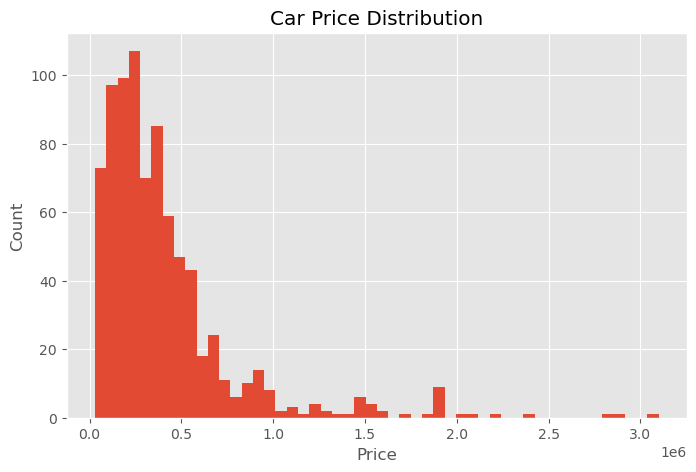

In [62]:
plt.figure(figsize=(8,5))
plt.hist(df['Price'], bins=50)
plt.title("Car Price Distribution")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

### Company vs Price

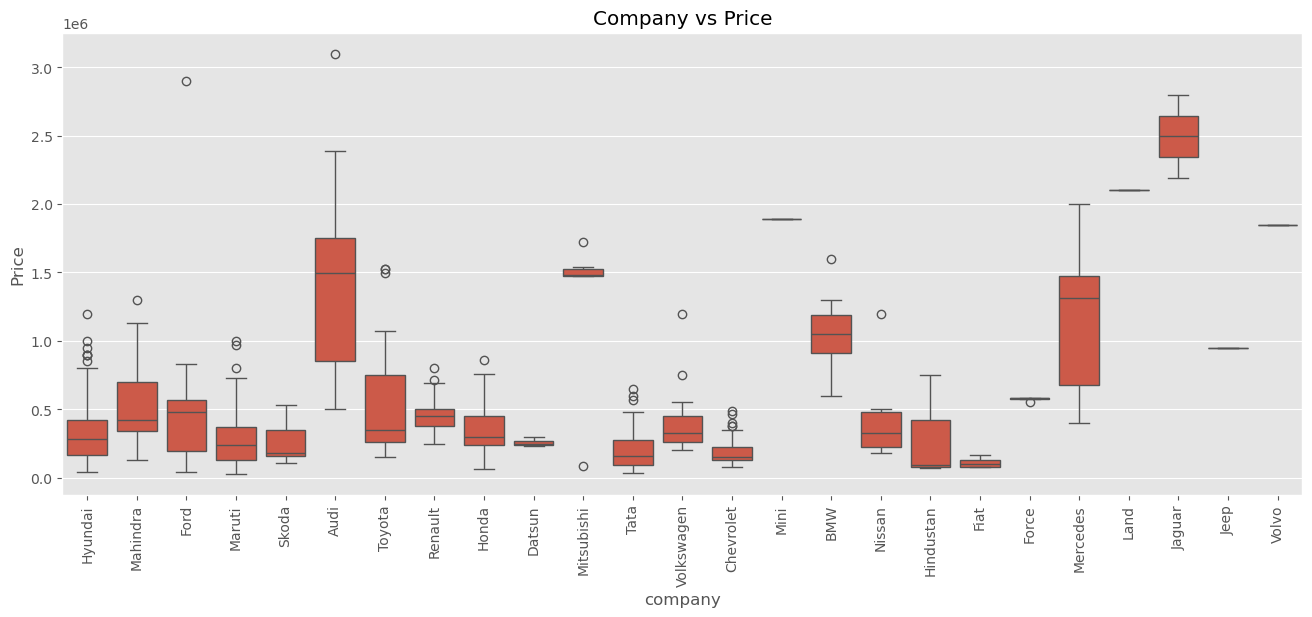

In [63]:
plt.figure(figsize=(16,6))
sns.boxplot(x='company', y='Price', data=df)
plt.xticks(rotation=90)
plt.title("Company vs Price")
plt.show()

### Year vs Price

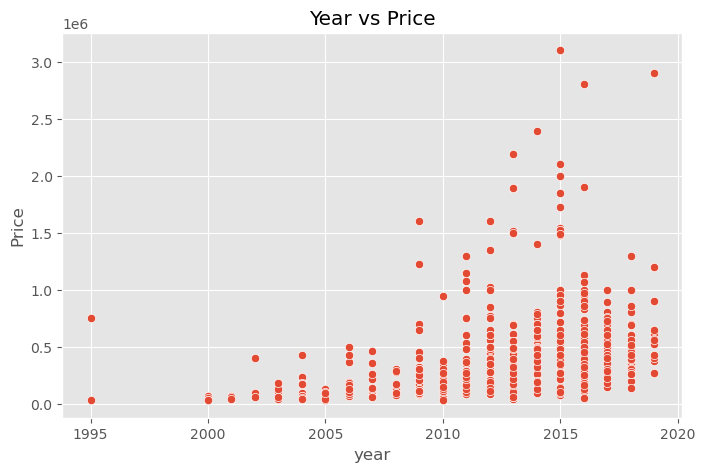

In [64]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='year', y='Price', data=df)
plt.title("Year vs Price")
plt.show()


### Kms Driven vs Price

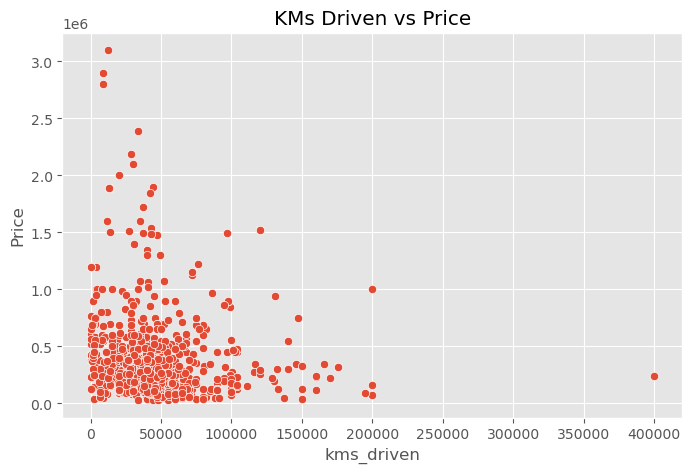

In [65]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='kms_driven', y='Price', data=df)
plt.title("KMs Driven vs Price")
plt.show()

### Fuel Type Distribution

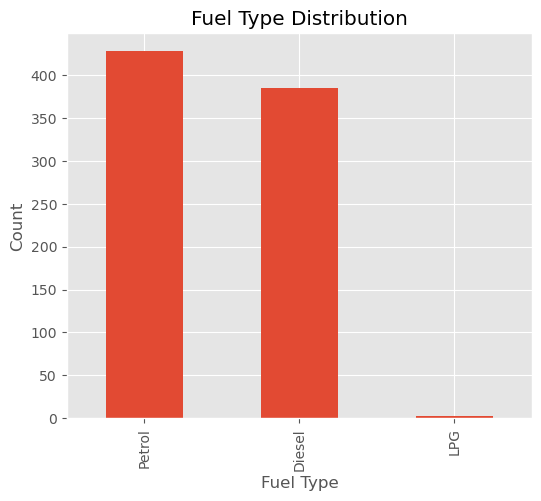

In [66]:
plt.figure(figsize=(6,5))
df['fuel_type'].value_counts().plot(kind='bar')
plt.title("Fuel Type Distribution")
plt.xlabel("Fuel Type")
plt.ylabel("Count")
plt.show()

## 8. Feature Engineering

In [67]:
print("\nPreparing features for ML...")

ml_df = df[['year', 'kms_driven', 'Price']]

X = ml_df[['year', 'kms_driven']]
y = ml_df['Price']


Preparing features for ML...


## 9. Train Test Split


In [68]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])

Training samples: 652
Testing samples: 163


## 10. Model Training

In [69]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## 11. Model Prediction

In [70]:
y_pred = model.predict(X_test)

## 12. Model Evaluation

In [71]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nModel Performance:")
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)


Model Performance:
MAE: 237753.84478945864
MSE: 179401996402.35074
RMSE: 423558.72839825973
R2 Score: 0.11902808475852056


## 13. Prediction for New Data

In [72]:
def predict_price(year, kms):
    data = np.array([[year, kms]])
    price = model.predict(data)
    return price[0]

example_price = predict_price(2019, 35000)
print("\nPredicted price for 2019 model with 35000 kms:", int(example_price))


Predicted price for 2019 model with 35000 kms: 595899


/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## 14. Save Cleaned Dataset

In [73]:
df.to_csv("cleaned_quikr_car.csv", index=False)
print("\nCleaned dataset saved as cleaned_quikr_car.csv")


Cleaned dataset saved as cleaned_quikr_car.csv


## 15. Save Model

In [74]:
import joblib
joblib.dump(model, "car_price_model.pkl")
print("Model saved as car_price_model.pkl")

Model saved as car_price_model.pkl


## 16. Project Completed

In [75]:
print("\n========== PROJECT COMPLETED SUCCESSFULLY ==========")


========== PROJECT COMPLETED SUCCESSFULLY ==========


# Imporve Performance

In [76]:
X = df[['company', 'fuel_type', 'year', 'kms_driven']]
y = df['Price']

categorical_features = ['company', 'fuel_type']
numerical_features = ['year', 'kms_driven']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', 'passthrough', numerical_features)
    ]
)

model = RandomForestRegressor(
    n_estimators=200,
    max_depth=20,
    random_state=42,
    n_jobs=-1
)

pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('model', model)
])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training model...")
pipeline.fit(X_train, y_train)
print("Training completed!")

y_pred = pipeline.predict(X_test)


mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\nImproved Model Performance:")
print("MAE :", round(mae, 2))
print("RMSE:", round(rmse, 2))
print("R2  :", round(r2, 3))

Training model...
Training completed!

Improved Model Performance:
MAE : 139780.96
RMSE: 290346.48
R2  : 0.586


# Summary

This project predicts used car prices using machine learning. Data was cleaned, categorical values were encoded, and a Random Forest model was trained. The model achieved improved accuracy with R² = 0.586. The trained model can predict prices for new cars based on company, fuel type, year, and kilometers driven.